## Data Exploration

#### Lets import the necessary libs and load the dataet.

In [132]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


In [133]:
#Reading Data
df = pd.read_csv('yellow_tripdata7.csv')

In [134]:
#number of rows and columns 
df.shape

(2821515, 18)

In [135]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-07-01 00:08:51,2021-07-01 00:13:05,1.0,0.8,1.0,N,90,68,1.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
1,1.0,2021-07-01 00:22:39,2021-07-01 00:25:58,1.0,0.9,1.0,N,113,90,2.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
2,1.0,2021-07-01 00:48:33,2021-07-01 00:54:58,1.0,2.8,1.0,N,88,232,2.0,10.0,3.0,0.5,0.0,0.0,0.3,13.8,2.5
3,1.0,2021-07-01 00:59:44,2021-07-01 01:07:09,1.0,1.4,1.0,N,79,249,1.0,7.0,3.0,0.5,1.5,0.0,0.3,12.3,2.5
4,1.0,2021-07-01 00:08:35,2021-07-01 00:16:28,0.0,2.0,1.0,N,142,238,1.0,8.5,3.0,0.5,0.0,0.0,0.3,12.3,2.5


In [136]:
df.tail(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2821510,NaN,2021-07-09 18:07:09,2021-07-09 18:27:04,NaN,2.60,NaN,NaN,68,144,NaN,14.00,1.00,0.5,2.75,0.0,0.3,21.05,2.5
2821511,NaN,2021-07-09 18:16:00,2021-07-09 18:57:00,NaN,12.47,NaN,NaN,92,144,NaN,47.08,2.75,0.5,0.00,0.0,0.3,50.63,0.0
2821512,NaN,2021-07-09 18:07:46,2021-07-09 19:07:06,NaN,3.01,NaN,NaN,265,249,NaN,23.96,0.00,0.5,0.00,0.0,0.3,24.76,0.0
2821513,NaN,2021-07-09 18:17:00,2021-07-09 18:42:00,NaN,6.67,NaN,NaN,262,211,NaN,24.24,0.00,0.5,5.96,0.0,0.3,33.50,2.5
2821514,NaN,2021-07-09 18:11:00,2021-07-09 18:30:00,NaN,3.51,NaN,NaN,232,68,NaN,15.27,0.00,0.5,3.96,0.0,0.3,22.53,2.5


In [137]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2704690,NaN,2021-07-02 10:58:00,2021-07-02 11:07:00,NaN,2.82,NaN,NaN,137,232,NaN,11.0,0.0,0.5,3.01,0.00,0.3,17.31,2.5
12238,1.0,2021-07-01 08:01:17,2021-07-01 08:08:25,0.0,0.90,1.0,N,48,186,1.0,6.0,2.5,0.5,0.00,0.00,0.3,9.30,2.5
1304278,2.0,2021-07-16 15:08:08,2021-07-16 15:18:32,1.0,1.30,1.0,N,237,161,1.0,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5
877021,2.0,2021-07-11 23:18:42,2021-07-11 23:40:25,1.0,8.82,1.0,N,138,229,1.0,27.0,0.5,0.5,6.41,0.00,0.3,38.46,2.5
135868,2.0,2021-07-02 16:11:23,2021-07-02 16:18:15,1.0,1.20,1.0,N,100,163,1.0,6.5,1.0,0.5,2.00,0.00,0.3,12.80,2.5
2366286,1.0,2021-07-28 15:39:26,2021-07-28 15:55:22,2.0,3.60,1.0,N,231,232,2.0,15.0,2.5,0.5,0.00,0.00,0.3,18.30,2.5
107216,2.0,2021-07-02 10:06:44,2021-07-02 10:20:51,1.0,6.05,1.0,N,229,194,1.0,18.0,0.0,0.5,3.00,6.55,0.3,30.85,2.5
2570556,2.0,2021-07-30 18:42:26,2021-07-30 19:09:27,1.0,11.93,1.0,N,132,70,2.0,34.0,1.0,0.5,0.00,0.00,0.3,37.05,0.0
561234,2.0,2021-07-08 11:35:32,2021-07-08 11:51:52,1.0,2.61,1.0,N,161,238,1.0,12.5,0.0,0.5,3.16,0.00,0.3,18.96,2.5
1281932,2.0,2021-07-16 11:33:07,2021-07-16 11:47:27,1.0,2.53,1.0,N,237,113,1.0,12.0,0.0,0.5,4.59,0.00,0.3,19.89,2.5


In [138]:
#split the df data for train and test
df_train,df_test=train_test_split(df, test_size=.01, random_state=199)

In [139]:
#split the df_train data for train and valudation
df_train,df_val = train_test_split(df_train, test_size=.01, random_state=199)

In [140]:
#number of rows and columns 
df_train.shape

(2765366, 18)

In [141]:
#number of rows and columns 
df_test.shape

(28216, 18)

In [142]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765366 entries, 1893944 to 292431
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 400.9+ MB


## Data Pre-Processing for data train

In [144]:
#drop in useful column that contains data it will not be used in data analysis 
df_train=df_train.drop('store_and_fwd_flag', axis=1)

In [145]:
df_train.shape

(2765366, 17)

#### Check if there are NULL value 

In [146]:
df_train.isnull().sum()

VendorID                 128068
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          128068
trip_distance                 0
RatecodeID               128068
PULocationID                  0
DOLocationID                  0
payment_type             128068
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [147]:
# drop Null
df_train=df_train.dropna(how='any')

In [148]:
df_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [149]:
#Check the count value
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
5.0          1
Name: payment_type, dtype: int64

In [150]:
#drop the 5
df_train=df_train.drop(df_train[df_train.payment_type.values==5].index)

In [151]:
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
Name: payment_type, dtype: int64

In [152]:
#Check the count value
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
0.0      65431
4.0      49640
6.0      43186
9.0          5
7.0          5
8.0          4
Name: passenger_count, dtype: int64

In [153]:
#drop the 0,9,7,8
df_train=df_train.drop(df_train[df_train.passenger_count.values==0].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==9].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==8].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==7].index)

In [154]:
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
4.0      49640
6.0      43186
Name: passenger_count, dtype: int64

In [155]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.total_amount.values<=0].index)

In [156]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.trip_distance.values<=0].index)

In [157]:
df_train.shape

(2530493, 17)

In [158]:
df_train_sample=df_train.sample(100000)

In [159]:
df_train_sample.total_amount.describe()

count    100000.000000
mean         19.385485
std          14.734265
min           0.300000
25%          11.760000
50%          14.800000
75%          20.300000
max         331.850000
Name: total_amount, dtype: float64

In [160]:
df_train_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2680644,2.0,2021-07-31 21:48:57,2021-07-31 21:57:30,1.0,1.09,1.0,107,249,1.0,7.0,0.5,0.5,2.16,0.00,0.3,12.96,2.5
1899103,2.0,2021-07-23 09:24:10,2021-07-23 09:45:21,1.0,4.42,1.0,226,236,2.0,17.5,0.0,0.5,0.00,0.00,0.3,20.80,2.5
2370966,1.0,2021-07-28 16:22:43,2021-07-28 16:45:26,1.0,2.20,1.0,113,13,1.0,15.5,3.5,0.5,2.00,0.00,0.3,21.80,2.5
1009244,2.0,2021-07-13 16:57:09,2021-07-13 17:11:28,1.0,1.05,1.0,142,229,1.0,10.0,1.0,0.5,4.29,0.00,0.3,18.59,2.5
296999,2.0,2021-07-04 23:52:41,2021-07-05 00:12:16,1.0,5.54,1.0,107,179,2.0,18.5,0.5,0.5,0.00,0.00,0.3,22.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297871,1.0,2021-07-05 00:19:30,2021-07-05 00:26:34,1.0,1.50,1.0,74,75,3.0,7.0,0.5,0.5,0.00,0.00,0.3,8.30,0.0
2538504,1.0,2021-07-30 12:55:50,2021-07-30 13:21:54,3.0,5.00,1.0,43,13,1.0,20.5,2.5,0.5,5.00,0.00,0.3,28.80,2.5
308611,2.0,2021-07-05 10:20:48,2021-07-05 10:25:27,1.0,0.62,1.0,162,170,1.0,5.0,0.0,0.5,1.66,0.00,0.3,9.96,2.5
2163813,2.0,2021-07-26 12:12:21,2021-07-26 12:14:31,1.0,0.52,1.0,143,48,1.0,3.5,0.0,0.5,2.00,0.00,0.3,8.80,2.5


In [161]:
df_train_sample['tpep_pickup_datetime']=pd.to_datetime(df_train_sample['tpep_pickup_datetime'])
df_train_sample['tpep_dropoff_datetime']=pd.to_datetime(df_train_sample['tpep_dropoff_datetime'])
df_train_sample['pickup_day_no']=df_train_sample['tpep_pickup_datetime'].dt.weekday
df_train_sample['dropoff_day_no']=df_train_sample['tpep_dropoff_datetime'].dt.weekday

In [162]:
df_train_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no
2680644,2.0,2021-07-31 21:48:57,2021-07-31 21:57:30,1.0,1.09,1.0,107,249,1.0,7.0,0.5,0.5,2.16,0.00,0.3,12.96,2.5,5,5
1899103,2.0,2021-07-23 09:24:10,2021-07-23 09:45:21,1.0,4.42,1.0,226,236,2.0,17.5,0.0,0.5,0.00,0.00,0.3,20.80,2.5,4,4
2370966,1.0,2021-07-28 16:22:43,2021-07-28 16:45:26,1.0,2.20,1.0,113,13,1.0,15.5,3.5,0.5,2.00,0.00,0.3,21.80,2.5,2,2
1009244,2.0,2021-07-13 16:57:09,2021-07-13 17:11:28,1.0,1.05,1.0,142,229,1.0,10.0,1.0,0.5,4.29,0.00,0.3,18.59,2.5,1,1
296999,2.0,2021-07-04 23:52:41,2021-07-05 00:12:16,1.0,5.54,1.0,107,179,2.0,18.5,0.5,0.5,0.00,0.00,0.3,22.30,2.5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297871,1.0,2021-07-05 00:19:30,2021-07-05 00:26:34,1.0,1.50,1.0,74,75,3.0,7.0,0.5,0.5,0.00,0.00,0.3,8.30,0.0,0,0
2538504,1.0,2021-07-30 12:55:50,2021-07-30 13:21:54,3.0,5.00,1.0,43,13,1.0,20.5,2.5,0.5,5.00,0.00,0.3,28.80,2.5,4,4
308611,2.0,2021-07-05 10:20:48,2021-07-05 10:25:27,1.0,0.62,1.0,162,170,1.0,5.0,0.0,0.5,1.66,0.00,0.3,9.96,2.5,0,0
2163813,2.0,2021-07-26 12:12:21,2021-07-26 12:14:31,1.0,0.52,1.0,143,48,1.0,3.5,0.0,0.5,2.00,0.00,0.3,8.80,2.5,0,0


In [163]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2680644 to 1856342
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  float64       
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   PULocationID           100000 non-null  int64         
 7   DOLocationID           100000 non-null  int64         
 8   payment_type           100000 non-null  float64       
 9   fare_amount            100000 non-null  float64       
 10  extra                  100000 non-null  float64       
 11  mta_tax                100000 non-null  float64       
 12  tip_amount             100000 non-nul

## Data Visualization for data train sample

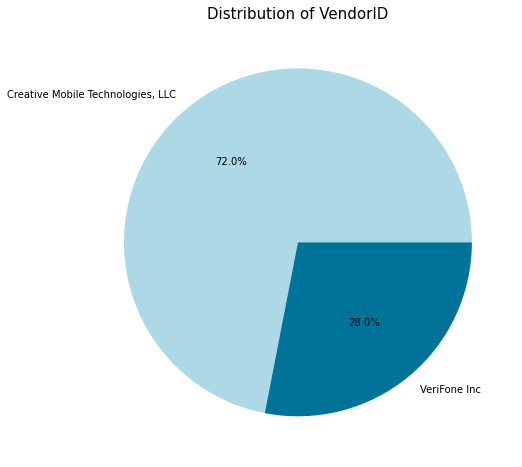

In [164]:
labels = ['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes = df_train_sample['VendorID'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of VendorID",color = 'black',fontsize = 15);

### The providers for taxi service

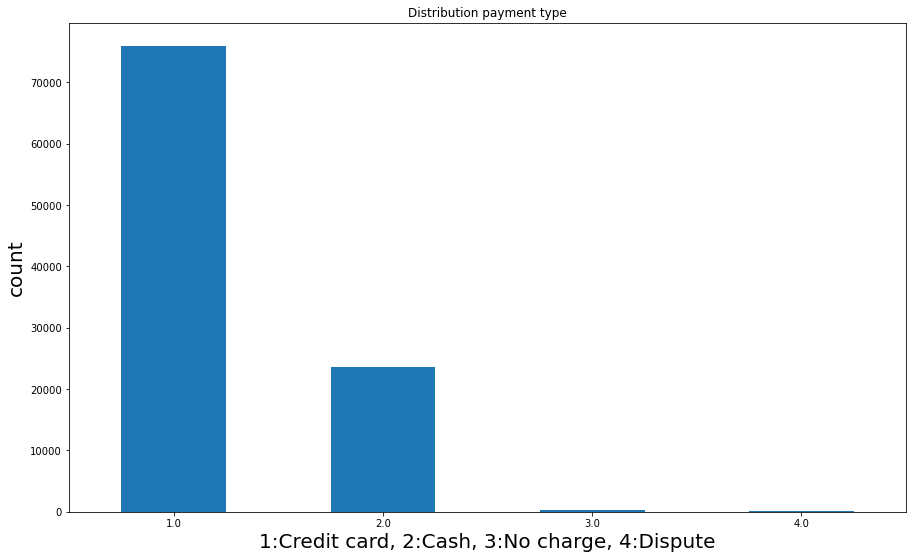

In [185]:
labels=['Credit card','Cash','No charge','Dispute']
df_train_sample['payment_type'].value_counts().plot(kind='bar', title= 'Distribution payment type' , figsize=(15,9), rot=0)
plt.xlabel('1:Credit card, 2:Cash, 3:No charge, 4:Dispute',fontsize = 20);
plt.ylabel('count',fontsize = 20);



### In this figure show a payment types

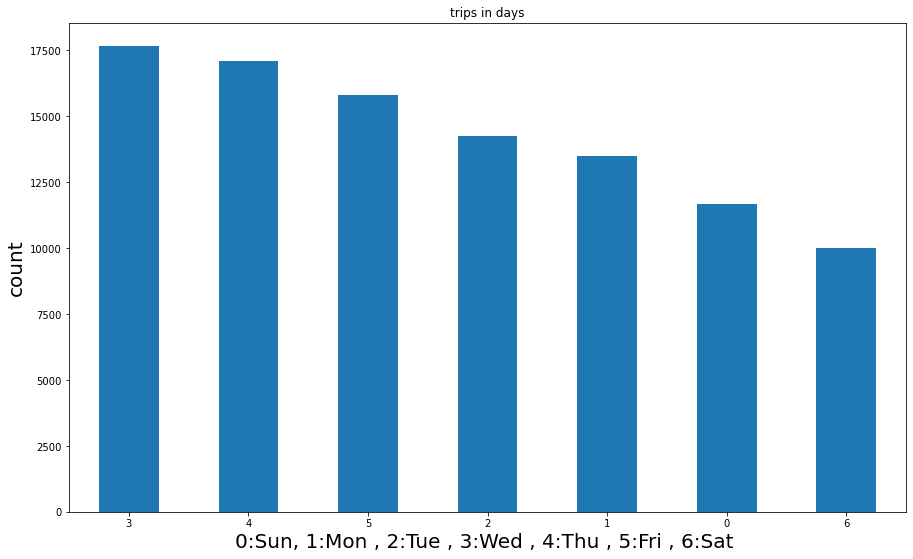

In [184]:
df_train_sample['pickup_day_no'].value_counts().plot(kind='bar', title= 'trips in days' , figsize=(15,9), rot=0)
plt.xlabel('0:Sun, 1:Mon , 2:Tue , 3:Wed , 4:Thu , 5:Fri , 6:Sat ',fontsize = 20);
plt.ylabel('count',fontsize = 20);


### graph shows how many trips in each day.

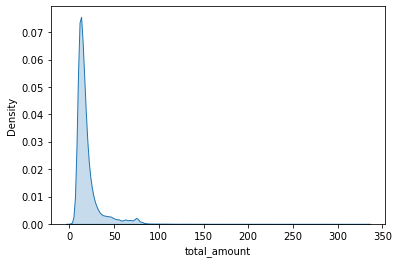

In [186]:
sns.kdeplot(data=df_train_sample['total_amount'], shade=True);

### Probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a total_amount.

In [187]:
df_train_sample=df_train_sample.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                      'fare_amount', 'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge','total_amount']]

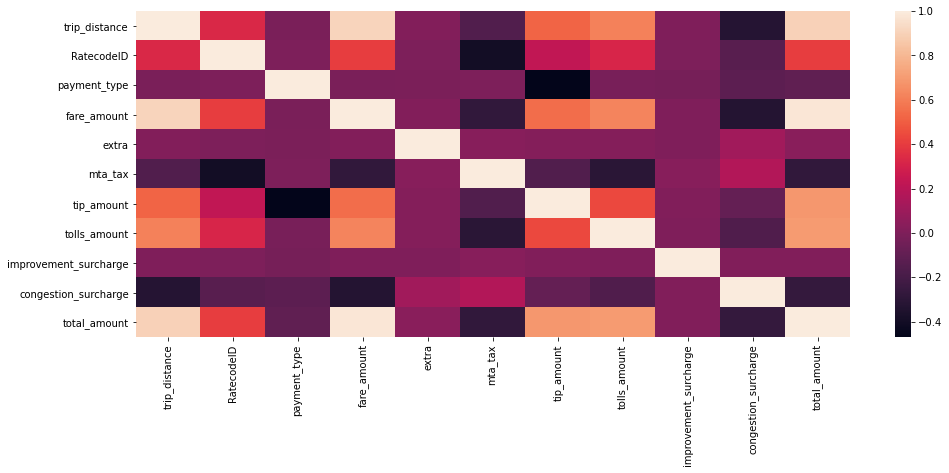

In [188]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_train_sample.corr());

### Correlation is a statistical measure that expresses
#### the extent to which two variables are linearly related (meaning they change together at a constant rate). 
#### In this heatmap noticed  a correlation between (trip_distance,total_amount), (RatecodeID,total_amount),
#### (fare_amount,total_amount), (tip_amount,total_amount), and (tolls_amount,Total_amount)

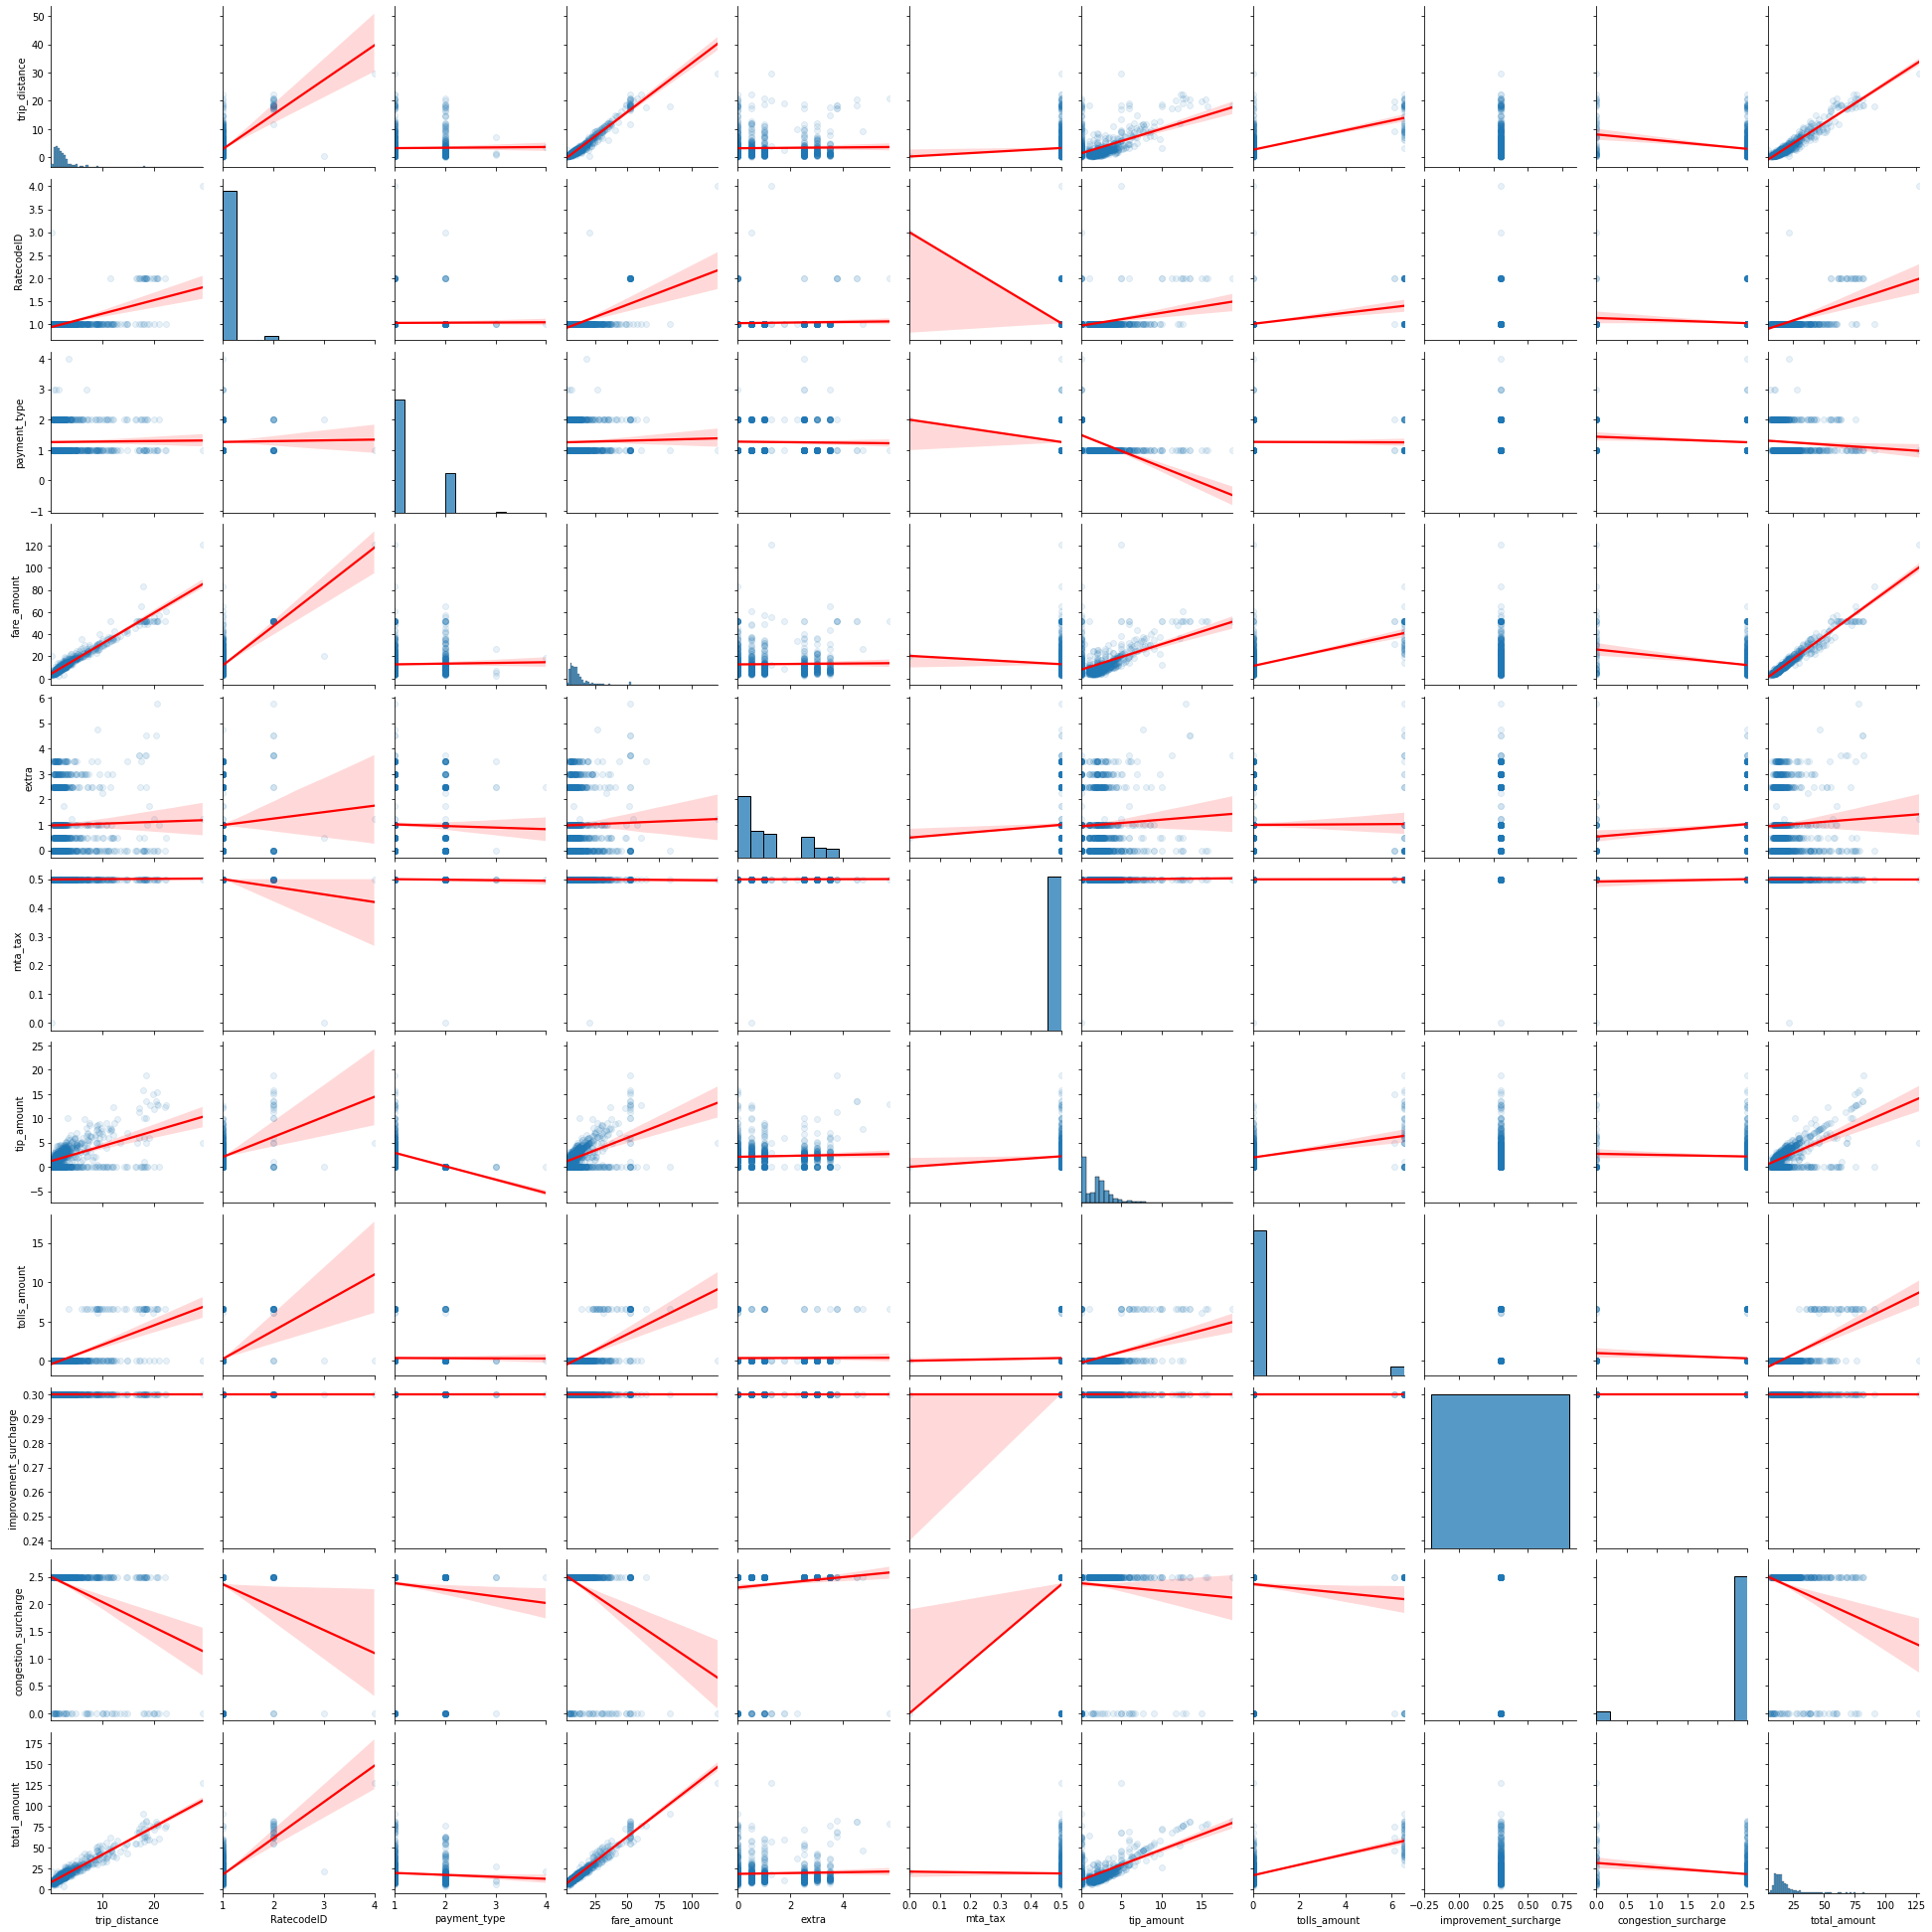

In [189]:
g = sns.pairplot(df_train_sample[:1000], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})


### Plot pairwise relationships 
#### By default, this function will create a grid of Axes such that each numeric variable in data
#### will be shared across the y-axes across a single row and the x-axes across a single column.
#### The diagonal plots are treated differently: a univariate distribution plot 
#### is drawn to show the marginal distribution of the data in each column.

## Data Pre-Processing for data validation 

In [190]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [191]:
#drop in useful column that contains data it will not be used in data analysis 
df_val=df_val.drop('store_and_fwd_flag', axis=1)

In [192]:
#number of rows and columns 

df_val.shape

(27933, 17)

### Check if there are NULL value 


In [193]:

df_val.isnull().sum()

VendorID                 1284
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1284
trip_distance               0
RatecodeID               1284
PULocationID                0
DOLocationID                0
payment_type             1284
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [194]:
#drop the null
df_val=df_val.dropna(how='any')

In [195]:
df_val.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [196]:
#Check the count value
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
0.0      691
4.0      479
6.0      457
7.0        1
9.0        1
Name: passenger_count, dtype: int64

In [197]:
#drop the 0,9,7,8
df_val=df_val.drop(df_val[df_val.passenger_count.values==0].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==9].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==8].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==7].index)

In [198]:
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
4.0      479
6.0      457
Name: passenger_count, dtype: int64

In [199]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.total_amount.values<=0].index)

In [200]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.trip_distance.values<=0].index)

In [201]:
df_val.shape

(25546, 17)

## Model 

In [225]:
X_train = df_train_sample.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                       'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge']]

y_train = df_train_sample['total_amount']

In [233]:
X_val = df_val.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                       'extra', 'mta_tax', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge']]

y_val = df_val['total_amount']

In [227]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.9084028409535397

In [228]:
lm.score(X_val, y_val)

0.8041952150437346

In [229]:
print(lm.intercept_)
print(lm.coef_)

6.8718363276814465
[  2.17913648   1.90319448   1.41719881   0.1947049  -29.63832168
   1.53872523   1.35510795  38.55051261   0.22016885]


In [230]:
preds = lm.predict(X_train)


In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_train, preds, squared=False)
mae = mean_absolute_error(y_train, preds)

In [232]:
print(rmse)
print(mae)

4.4593064612273
1.8546283063850624
